# Prepare Fragments for Docking

7th June 2022 - Notebook for loading and preparing Mpro fragments for docking

In [2]:
import pandas as pd

data_dir = '/Users/williammccorkindale/ml_physics/PhD_data/FRESCO/Mpro'

noncovalent_frag_site_name = 'XChem Screen - active site'

df_metadata = pd.read_csv(f'{data_dir}/metadata.csv')
df_frags = df_metadata.query('site_name == @noncovalent_frag_site_name').reset_index()
df_frags


,index,Unnamed: 0,crystal_name,RealCrystalName,smiles,new_smiles,alternate_name,site_name,pdb_entry
0,9,11,Mpro-x0354_0A,Mpro-x0354,CN1CCN(CC1)C(=O)COC=2C=CC(C)=CC2,NaN,AAR-POS-d2a4d1df-6,XChem Screen - active site,5RE9
1,13,15,Mpro-x0426_0A,Mpro-x0426,FC=1C=CC=CC1C(=O)NCCC=2C=CN=CC2,NaN,AAR-POS-d2a4d1df-10,XChem Screen - active site,5RGK
2,22,24,Mpro-x0104_0A,Mpro-x0104,CC(=O)NCCC1=CNC=2C=CC(F)=CC12,NaN,AAR-POS-d2a4d1df-2,XChem Screen - active site,5R7Z
3,49,51,Mpro-x0195_0A,Mpro-x0195,CN1CCCC=2C=CC(=CC12)S(=O)(=O)N,NaN,AAR-POS-d2a4d1df-4,XChem Screen - active site,5R81
4,110,112,Mpro-x0072_0A,Mpro-x0072,CS(=O)(=O)NCCC=1C=CC=CC1,NaN,AAR-POS-d2a4d1df-1,XChem Screen - active site,5R7Y
5,114,116,Mpro-x0305_0A,Mpro-x0305,CCNC=1C=CC(C#N)=CN1,NaN,AAR-POS-d2a4d1df-5,XChem Screen - active site,5R82
6,119,121,Mpro-x0161_0A,Mpro-x0161,COC(=O)C=1C=CC(=CC1)S(=O)(=O)N,NaN,MAT-POS-7dfc56d9-1,XChem Screen - active site,5R80
7,129,131,Mpro-x1077_0A,Mpro-x1077,N#CC=1C=CC(=CN1)N2CCCOCC2,NaN,AAR-POS-d2a4d1df-19,XChem Screen - active site,5RF6
8,145,147,Mpro-x0874_0A,Mpro-x0874,O=C([C@@H]1[C@H](C2=CSC=C2)CCC1)N,NaN,AAR-POS-d2a4d1df-14,XChem Screen - active site,5REZ
9,174,176,Mpro-x1249_0A,Mpro-x1249,O=C(NCC=1C=CC(C#N)=CC1)N2CCOCC2,NaN,AAR-POS-d2a4d1df-21,XChem Screen - active site,5RFE


Add hydrogens, generate conformer, and write to file

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from ccdc.molecule import Molecule
prep_frag_dir = '/Users/williammccorkindale/ml_physics/smi2wyck/notebooks/docking/mpro_fragments'

for _, row in df_frags.iterrows():
    
    mol = Chem.MolFromSmiles(row['smiles'])
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    mol_block = Chem.MolToMolBlock(mol)
    prepared_csd_mol = Molecule.from_string(mol_block)
    with open(f'{prep_frag_dir}/prepared_{row.RealCrystalName}.mol2', 'w') as writer:
        writer.write(prepared_csd_mol.to_string('mol2'))
    


INFO:rdkit:Enabling RDKit 2022.03.2 jupyter extensions


Naive dock

In [8]:
import tempfile
from ccdc.docking import Docker
from ccdc.io import MoleculeReader, EntryReader

def return_mpro_docker():

    docker = Docker()
    settings = docker.settings

    mpro_dir = '/Users/williammccorkindale/ml_physics/PhD_data/FRESCO/Apo_Mpro_6YB7'

    mpro_protein_file = f'{mpro_dir}/6LU7_protein.mol2'
    settings.add_protein_file(mpro_protein_file)

    mpro_native_ligand_file = f'{mpro_dir}/6LU7_ligand.mol2'
    mpro_native_ligand = MoleculeReader(mpro_native_ligand_file)[0]

    mpro_protein = settings.proteins[0]
    settings.binding_site = settings.BindingSiteFromLigand(mpro_protein, mpro_native_ligand, 8.0)

    settings.fitness_function = 'plp'
    settings.autoscale = 10.
    settings.early_termination = False
    settings.write_options = 'MIN_OUT'
    batch_tempd = tempfile.mkdtemp()
    settings.output_directory = '/Users/williammccorkindale/ml_physics/smi2wyck/notebooks/docking/results/'
    settings.output_file = 'docked_ligands.mol2'
    
    return docker

docker = return_mpro_docker()
n_docks = 2
for _, row in df_frags.iterrows():
    
    docker.settings.add_ligand_file(f'{prep_frag_dir}/prepared_{row.RealCrystalName}.mol2', ndocks=n_docks)

results = docker.dock() 
if results.return_code == 0 and results.ligands[0].fitness() is not None:
    print('Docking successful')
    
    print(f'{len(results.ligands)} Docks completed')

else:
    print('Something went wrong...')

Starting GOLD with conf file /Users/williammccorkindale/ml_physics/smi2wyck/notebooks/docking/api_gold.conf
Setting up GOLD environment...
GOLD Version 2022.1.0
Running:
 
     "/Applications/CCDC/Discovery_2022/GOLD/gold/d_macx/bin/gold_macx" "/Users/williammccorkindale/ml_physics/smi2wyck/notebooks/docking/api_gold.conf"



Warning message: 
check_atom_types: can't deduce type of atom   59 in /Users/williammccorkindale/ml_physics/smi2wyck/notebooks/docking/cavity_C_6LU7.mol2

Warning message: 
read_cavity_from_ligand: Ligand atom 58 from cavity ligand file '/Users/williammccorkindale/ml_physics/smi2wyck/notebooks/docking/cavity_C_6LU7.mol2' clashes with protein atom 4680


********************************************************************************
Ligand in file /Users/williammccorkindale/ml_physics/smi2wyck/notebooks/docking/mpro_fragments/prepared_Mpro-x0354.mol2,
starting at address 0 raised the following warnings and/or errors
Warning message: 
check_aromatic_bonds_and_atoms:
 atom   12 in /Users/williammccorkindale/ml_physics/smi2wyck/notebooks/docking/mpro_fragments/prepared_Mpro-x0354.mol2 is type   C.2 but should be  C.ar

Warning message: 
check_aromatic_bonds_and_atoms:
 bond   12 in /Users/williammccorkindale/ml_physics/smi2wyck/notebooks/docking/mpro_fragments/prepared_Mpro-x0354.mol2 is 

Docking successful
40 Docks completed


@<TRIPOS>MOLECULE
unknown|prepared_Mpro-x0354|mol2|1|dock4
    43    44     1     0     0
SMALL
NO_CHARGES
****
Generated from the CSD

@<TRIPOS>ATOM
     1 C1     -12.2848  12.9007  63.3895   C.3       1 RES1   0.0000
     2 N2     -11.2670  13.2863  64.3173   N.4       1 RES1   0.0000
     3 C3     -10.2703  12.2685  64.4510   C.3       1 RES1   0.0000
     4 C4     -10.7867  11.0560  65.2218   C.3       1 RES1   0.0000
     5 N5     -11.3138  11.5483  66.4627   N.am      1 RES1   0.0000
     6 C6     -12.3021  12.5937  66.4412   C.3       1 RES1   0.0000
     7 C7     -11.7562  13.7176  65.5874   C.3       1 RES1   0.0000
     8 C8     -10.8601  11.0053  67.6845   C.2       1 RES1   0.0000
     9 O9      -9.9948  10.0897  67.7308   O.2       1 RES1   0.0000
    10 C10    -11.4181  11.5272  68.9538   C.3       1 RES1   0.0000
    11 O11    -11.2354  12.9214  68.9798   O.3       1 RES1   0.0000
    12 C12    -11.7887  13.6501  70.0349   C.ar      1 RES1   0.0000
    13 C13    -12.5910

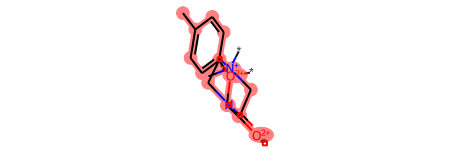

In [146]:
from rdkit.Chem.rdmolfiles import MolFromMol2Block

# for ligand in results.ligands:
docked_mol_block = results.ligands[2].molecule.to_string()
print(docked_mol_block)
rdkit_mol = MolFromMol2Block(docked_mol_block)
mol_from_smiles_file = Chem.MolFromSmiles(df_frags.smiles.values[0])
ref_mol = AllChem.AssignBondOrdersFromTemplate(mol_from_smiles_file, rdkit_mol)
ref_mol

In [12]:
df_scores = pd.DataFrame(columns=['RealCrystalName', 'smiles', 'score'])

for index, row in df_frags.iterrows():
    for ligand_index in range(index*n_docks, (index+1)*n_docks):
        try:
            ligand = results.ligands[ligand_index]
            score = ligand.fitness()
            df_scores = df_scores.append({'RealCrystalName': row.RealCrystalName, 'smiles': row.smiles, 'ligand_index': ligand_index, 'score': score}, ignore_index=True)
        except:
            pass
df_scores

,RealCrystalName,smiles,score,ligand_index
0,Mpro-x0354,CN1CCN(CC1)C(=O)COC=2C=CC(C)=CC2,44.9205,0.0
1,Mpro-x0354,CN1CCN(CC1)C(=O)COC=2C=CC(C)=CC2,48.1828,1.0
2,Mpro-x0426,FC=1C=CC=CC1C(=O)NCCC=2C=CN=CC2,57.3072,2.0
3,Mpro-x0426,FC=1C=CC=CC1C(=O)NCCC=2C=CN=CC2,49.9935,3.0
4,Mpro-x0104,CC(=O)NCCC1=CNC=2C=CC(F)=CC12,44.5659,4.0
5,Mpro-x0104,CC(=O)NCCC1=CNC=2C=CC(F)=CC12,50.3251,5.0
6,Mpro-x0195,CN1CCCC=2C=CC(=CC12)S(=O)(=O)N,40.3705,6.0
7,Mpro-x0195,CN1CCCC=2C=CC(=CC12)S(=O)(=O)N,43.2479,7.0
8,Mpro-x0072,CS(=O)(=O)NCCC=1C=CC=CC1,44.4608,8.0
9,Mpro-x0072,CS(=O)(=O)NCCC=1C=CC=CC1,47.1679,9.0


In [15]:
df_best_poses = df_scores.sort_values(by='score', ascending=False).drop_duplicates(subset=['RealCrystalName', 'smiles'], keep='first').astype({'ligand_index': int})
df_best_poses

,RealCrystalName,smiles,score,ligand_index
36,Mpro-x0540,O=C(NCCC=1C=CN=CC1)NC2CCCCC2,58.0547,36
2,Mpro-x0426,FC=1C=CC=CC1C(=O)NCCC=2C=CN=CC2,57.3072,2
26,Mpro-x1093,CN1CCN(CC1)C(=O)CC1=CNC2=NC=CC=C12,52.5756,26
30,Mpro-x0967,CC(=O)NC(Cc1ccc(cc1)O)C(=O)NCC#CBr,51.2811,30
5,Mpro-x0104,CC(=O)NCCC1=CNC=2C=CC(F)=CC12,50.3251,5
1,Mpro-x0354,CN1CCN(CC1)C(=O)COC=2C=CC(C)=CC2,48.1828,1
9,Mpro-x0072,CS(=O)(=O)NCCC=1C=CC=CC1,47.1679,9
18,Mpro-x1249,O=C(NCC=1C=CC(C#N)=CC1)N2CCOCC2,47.0372,18
22,Mpro-x2193,CS(=O)(=O)c1ccc(cc1)N1CCNCC1,45.9846,22
14,Mpro-x1077,N#CC=1C=CC(=CN1)N2CCCOCC2,44.3030,14


In [16]:
df_best_poses.to_csv('mpro_frags_best_poses.csv', index=False)